In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.manifold
import scprep

# make text in pdf export editable
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

load data

In [68]:
inf = '1.30'
mev_path = '/Users/6j9/projects/mouse/data/irf-mcl/mean_exp_vectors/mean_exp_vectors_' + inf + '.tsv'
groups_path = '/Users/6j9/projects/mouse/data/irf-mcl/mean_exp_vectors/hierarchical_groups_' + inf + '.txt'
out_dir = '/Users/6j9/projects/mouse/plots/irf_mean_exp_plots/tsne'

group_names = ['Fibroblasts 1', 'Fibroblasts 2', 'Fibroblasts 3', 'Macrophages',
               'Dendritic Cells', 'ILC/Lymphocytes', 'Keratinocytes',
               'Misc. Tissue', 'Misc. Immune', 'Misc. Tissue', 'Misc. Immune', 'Dead',
               'Muscle Cells', 'Dead', 'Mast Cells', 'Dead', 'Dead', 'Dead']

# organized by np.unique(group_names) order
group_colors = ['grey', 'darkorange', 'cornflowerblue', 'blue', 'darkblue',
                'gold', 'saddlebrown', 'pink', 'magenta',
                'red', 'lightgreen', 'darkgreen']

In [69]:
mev = pd.read_csv(mev_path, index_col=0, header=0, sep='\t')
groups = []
with open(groups_path) as in_file:
    for line in in_file:
        groups.append([int(x) for x in line.strip('\n').strip('][').split(', ')])
        
cluster_labels = np.full(len(mev.columns), "", dtype='U20')
for i, group in enumerate(groups):
    for cluster in group:
        cluster_labels[cluster - 1] = group_names[i]

cmap = {}
for i, group_name in enumerate(np.unique(group_names)):
    cmap[group_name] = group_colors[i]

In [105]:
random_state = 11

In [106]:
tsne_operator = sklearn.manifold.TSNE(n_components=2, learning_rate=100, random_state=random_state)
Y_tsne = tsne_operator.fit_transform(mev.values.T)

t-SNE plot

transpose mean expression vector because sklearn's tsne operator acts on columns and we have genes on rows before transposing

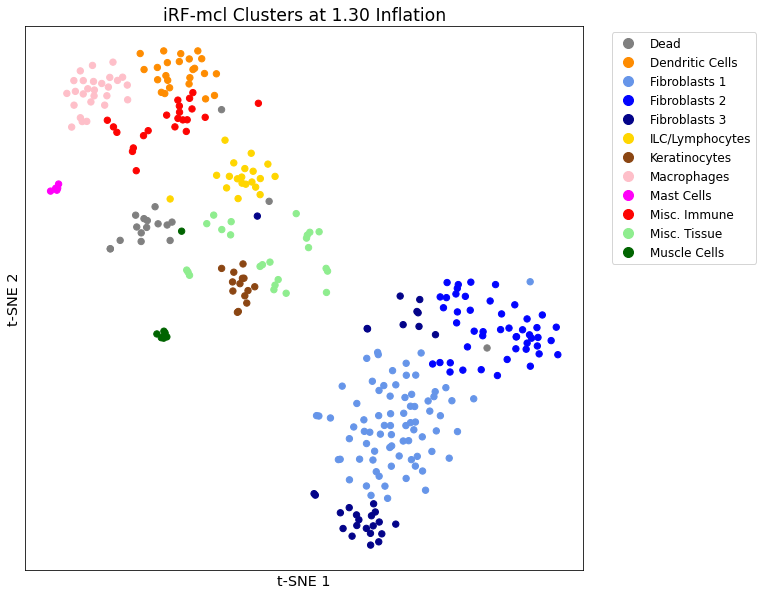

In [110]:
figsize = (10, 10)
fig, ax = plt.subplots(1, 1, figsize=figsize)
title = 'iRF-mcl Clusters at 1.30 Inflation'
scprep.plot.scatter2d(Y_tsne, label_prefix='t-SNE ', title=title, ticks=False, cmap=group_colors, legend_ncol=1,
                      ax=ax, c=cluster_labels, legend=True, legend_anchor=(1.04, 1), legend_loc='upper left', s=40)

plt.savefig('/Users/6j9/projects/mouse/plots/final/fig1/tsne_irf-1.30_all-cts_new.pdf',
            bbox_inches='tight', transparent=True)
plt.show()

Run this to color by cre+ / cre- :

['Mixed Cre+/Cre-' 'Mostly Cre+' 'Mostly Cre-']


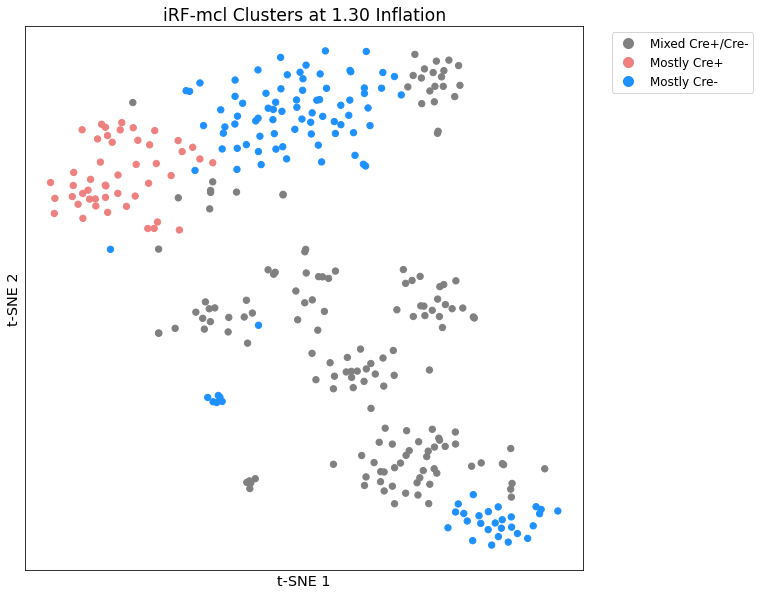

In [65]:
group_names = ['Mostly Cre-', 'Mostly Cre+', 'Mixed Cre+/Cre-', 'Mostly Cre-',
               'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-',
               'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-',
               'Mostly Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-', 'Mixed Cre+/Cre-']

# organized by np.unique(group_names) order
print(np.unique(group_names))
group_colors = ['grey', 'lightcoral', 'dodgerblue']

cluster_labels = np.full(len(mev.columns), "", dtype='U20')
for i, group in enumerate(groups):
    for cluster in group:
        cluster_labels[cluster - 1] = group_names[i]
        
figsize = (10, 10)
fig, ax = plt.subplots(1, 1, figsize=figsize)
title = 'iRF-mcl Clusters at 1.30 Inflation'
scprep.plot.scatter2d(Y_tsne, label_prefix='t-SNE ', title=title, ticks=False, cmap=group_colors, legend_ncol=1,
                      ax=ax, c=cluster_labels, legend=True, legend_anchor=(1.04, 1), legend_loc='upper left', s=40)

plt.savefig('/Users/6j9/projects/mouse/plots/final/fig1/tsne_irf-1.30_all-cre.pdf',
            bbox_inches='tight', transparent=True)
plt.show()

Plotting dendrograms of hierarchial clustering for the above. This requires the pearson correlation file to use as distances.

In [53]:
cmap

{'Dead': 'grey',
 'Dendritic Cells': 'darkorange',
 'Fibroblasts 1': 'cornflowerblue',
 'Fibroblasts 2': 'blue',
 'Fibroblasts 3': 'darkblue',
 'ILC/Lymphocytes': 'gold',
 'Keratinocytes': 'saddlebrown',
 'Macrophages': 'pink',
 'Mast Cells': 'magenta',
 'Misc. Immune': 'red',
 'Misc. Tissue': 'lightgreen',
 'Muscle Cells': 'darkgreen'}

In [19]:
import matplotlib as mpl
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform, pdist

pearson_path = '/Users/6j9/projects/mouse/data/irf-mcl/mean_exp_vectors/pearson_corr_matrix_1.30.tsv'

cor = pd.read_csv(pearson_path, index_col=0, header=0, sep='\t')
sim = 1 - cor
hierarchy = sch.linkage(squareform(sim), 'ward')

<ipython-input-25-a5352e3dfbe4>:50: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])


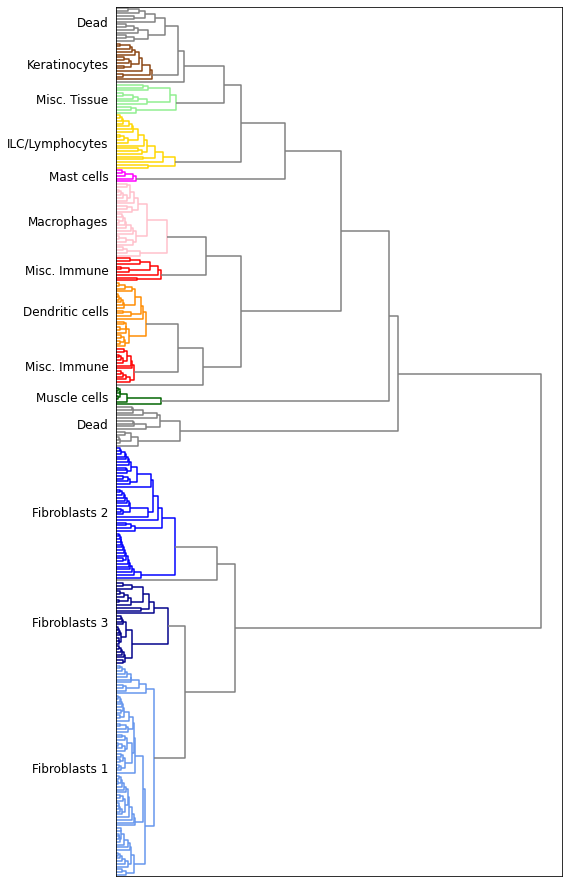

In [25]:
# fixing the color order for the needs of sch.dendrogram
group_colors = ['cornflowerblue', 'darkblue', 'blue', 'grey', 'grey',
                'darkgreen', 'red', 'darkorange', 'red', 'pink',
                'magenta', 'gold', 'lightgreen', 'saddlebrown', 'grey']

sch.set_link_color_palette(group_colors)

figsize = (8, 16)
#figsize = (24, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)
threshold = 0.5
dendro = sch.dendrogram(hierarchy, ax=ax, orientation='right', color_threshold=threshold,
#dendro = sch.dendrogram(hierarchy, ax=ax, orientation='top', color_threshold=threshold,
                        labels=sim.index, above_threshold_color='grey')

idx = np.unique(np.array(dendro['color_list']), return_index=True)[1]
  
tick_colors = np.array(dendro['color_list'])
midpoints = []
current_color = tick_colors[0]
segment_length = 1
total = 1
for i, color in enumerate(tick_colors):
    if color == current_color:
        segment_length += 1
    else:
        midpoints.append(total + int(segment_length/2))
        if color in ['darkgreen', 'lightgreen']:
            total += segment_length + 1
        else:
            total += segment_length
        current_color = color
        segment_length = 1
        
# manual edits because of random grey color singletons that don't match up returned by dendro
midpoints = [39, 92, 132, 164, 174, 185, 205, 220, 238, 254, 266, 282, 295, 310]

# manual section names
section_names = ['Fibroblasts 1', 'Fibroblasts 3', 'Fibroblasts 2', 'Dead', 'Muscle cells', 'Misc. Immune',
                 'Dendritic cells', 'Misc. Immune', 'Macrophages', 'Mast cells', 'ILC/Lymphocytes',
                 'Misc. Tissue', 'Keratinocytes', 'Dead']

labels = np.full(len(ax.get_yticklabels()), '', dtype='U20')
#labels = np.full(len(ax.get_xticklabels()), '', dtype='U20')
for i, midpoint in enumerate(midpoints):
    labels[midpoint] = section_names[i]

ax.set_yticklabels(labels, fontsize=12)
#ax.set_xticklabels(labels, fontsize=12, rotation=90)
ax.set_xticks([], [])
#ax.set_yticks([], [])

plt.savefig('/Users/6j9/projects/mouse/plots/final/fig1/dendro_irf-1.30_all-ct.pdf',
            bbox_inches='tight', transparent=True)
plt.show()

tsne stuff for CCL11 fig2 to keep the same tsne view:

In [31]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import math

chemokine_exp_path = '/Users/6j9/projects/mouse/cytoscape/attributes/expression/chemokine_cols.tsv'
cc_exp = pd.read_csv(chemokine_exp_path, sep='\t', index_col=0)

In [41]:
cxcl1_path = '/Users/6j9/projects/mouse/revisions/cxcl1.tsv'
cxcl1 = pd.read_csv(cxcl1_path, sep='\t', header=None, index_col=0)
cxcl1.columns = ['CXCL1']

In [112]:
cebpb_path = '/Users/6j9/projects/mouse/revisions/cebpb.tsv'
cebpb = pd.read_csv(cebpb_path, sep='\t', header=0, index_col=0)

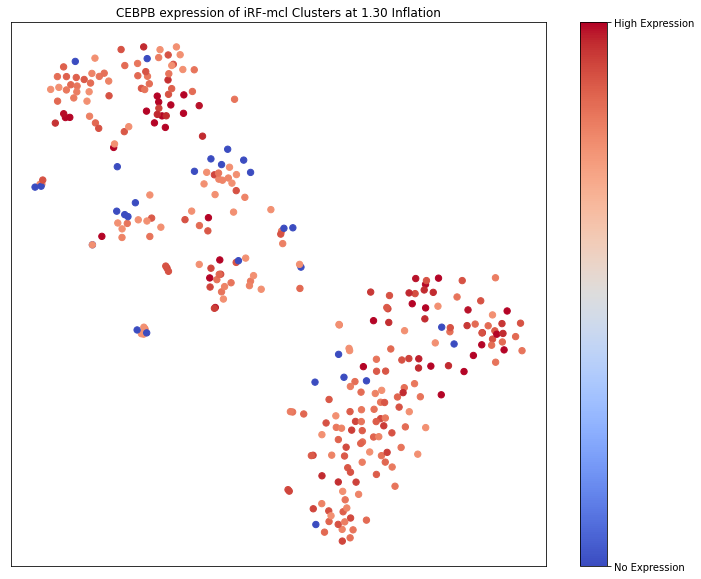

In [113]:
# choose chemokine
chemokine = 'CEBPB'
#ccl11 = cc_exp[chemokine]
#ccl11 = cxcl1['CXCL1']
ccl11 = cebpb['CEBPB']

mcl_path = '/Users/6j9/projects/mouse/data/irf-mcl/mcl_clusters/mouseUPenn_iRF-LOOP_normalized_0.04_mcl_clusters_1.30.txt'
clusters = {}
cluster_count = 0
with open(mcl_path) as cluster_file:
    for line in cluster_file:
        cluster_count += 1
        clusters[cluster_count] = line.strip().split('\t')

cluster_exp = {}
for cluster, bcs in clusters.items():
    bc_idx = ccl11[bcs] != 0
    exp = ccl11[bcs][bc_idx].mean()
    if math.isnan(exp):
        cluster_exp[cluster] = 0
    else:
        cluster_exp[cluster] = ccl11[bcs][bc_idx].mean()
        
# plot

ccl_values = np.array(list(cluster_exp.values()))
nnz_ccl = np.sort(ccl_values[ccl_values != 0])
#ccl_min = np.min(nnz_ccl)
ccl_min = -5
upper_cutoff = 0.9
ccl_max = nnz_ccl[int(upper_cutoff * len(nnz_ccl))]

sm = ScalarMappable(norm=Normalize(vmin=ccl_min, vmax=ccl_max),
                                   cmap=plt.get_cmap('coolwarm'))
                    
color = []
for cluster, value in cluster_exp.items():
    if value > ccl_max:
        color.append(sm.to_rgba(ccl_max))
    elif value == 0:
        color.append(sm.to_rgba(ccl_min))
    else:
        color.append(sm.to_rgba(value))

figsize = (12, 10)
fig, ax = plt.subplots(1, 1, figsize=figsize)
title = chemokine + ' expression of iRF-mcl Clusters at 1.30 Inflation'
ax.scatter(Y_tsne[:, 0], Y_tsne[:, 1], s=40, color=color)
ax.set_title(title)
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(sm)
cbar.set_ticks([ccl_min, ccl_max])
cbar.set_ticklabels(['No Expression', 'High Expression'])
#cbar.set_ticklabels(['0', str(round(ccl_max, 2))])

plt.savefig('/Users/6j9/projects/mouse/plots/final/fig2/tsne_irf-1.30_all-' + chemokine + '.pdf',
            bbox_inches='tight', transparent=True)
plt.show()